### Universidad Galileo 
### Postgrado en Análisis y predicción de Datos
### Ciencia de Datos en Python
### Nixon Armando López Claudio 
### Proyecto 1 - Regresión Lineal con Python

<h1><center> Proyecto 1 - Regresión Lineal con Python </center></h1>

### Cargar las librarías necesarias 

In [1]:
# Importar Librerías (Entorno de anaconda con los paquetes necesarios para efectuar el proceso de Regresión Lineal con Python)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math 
import sys 
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


### Cargar Datos

In [2]:
df_datos = pd.DataFrame(np.load("proyecto_training_data.npy")\
                  ,columns = ['sale_price','overallquial','stfloor_square','room','year_built','lot_frontage']) #Carga de datos

In [3]:
df_datos.info() #información de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sale_price      1460 non-null   float64
 1   overallquial    1460 non-null   float64
 2   stfloor_square  1460 non-null   float64
 3   room            1460 non-null   float64
 4   year_built      1460 non-null   float64
 5   lot_frontage    1201 non-null   float64
dtypes: float64(6)
memory usage: 68.6 KB


In [4]:
df_datos.head(5) #esto ayuda a verificar la forma en que está estructurada la data.

,sale_price,overallquial,stfloor_square,room,year_built,lot_frontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


In [5]:
df_datos.shape # esto ayuda cuántas líneas de filas y cuántas columnas se tienen en la data.

(1460, 6)

In [6]:
df_datos.describe() # acá se determina el análsisis de datos principal de cada variable, es decir un análisis estadístico principal. 

,sale_price,overallquial,stfloor_square,room,year_built,lot_frontage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000
mean,180921.195890,6.099315,1162.626712,6.517808,1971.267808,70.049958
std,79442.502883,1.382997,386.587738,1.625393,30.202904,24.284752
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,129975.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,163000.000000,6.000000,1087.000000,6.000000,1973.000000,69.000000
75%,214000.000000,7.000000,1391.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000


In [7]:
df_datos['lot_frontage'] = df_datos['lot_frontage'].fillna( df_datos['lot_frontage'].mean() ) 
df_datos['lot_frontage'] = df_datos['lot_frontage'].astype(int)
df_datos['year_built'] = df_datos['year_built'].astype(int)
df_datos["valor1"] = 1            # esta es otra forma de analizar los datos

### En este momento, será necesario separar los datos en 2 datasets: Entrenamiento 80 % y Prueba 20%

In [8]:
x = df_datos.iloc[:,1:].values #esta es la variable independiente
y = df_datos.iloc[:,:1].values #esta es la variable dependiente

In [9]:
x_entrenamiento, x_prueba, y_entrenamiento, y_prueba = train_test_split(x,y, test_size = 0.2 , random_state = 0) #se obtiene el 80% de entrenamiento y 20% de prueba

>A continuación se obtienen los datos principales del 80 % de los datos, es decir 1168 datos de cada variable, en el que se obtienen la cantidad de datos, la media, la desviación estándar, el valor mínimo y el valor máximo, para cada variable de la base de datos.

In [10]:
df_datos_entrenamiento = (pd.DataFrame(x_entrenamiento)).rename(columns = {0:'overallquial',1:'stfloor_square',2:'room',3:'year_built',4:'lot_frontage' })
df_datos_entrenamiento.describe()

,overallquial,stfloor_square,room,year_built,lot_frontage,5
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.0
mean,6.086473,1160.958904,6.544521,1970.890411,69.684075,1.0
std,1.367472,373.315037,1.624493,30.407486,20.758010,0.0
min,1.000000,334.000000,2.000000,1872.000000,21.000000,1.0
25%,5.000000,884.000000,5.000000,1953.750000,60.000000,1.0
50%,6.000000,1092.000000,6.000000,1972.000000,70.000000,1.0
75%,7.000000,1389.250000,7.000000,2000.000000,79.000000,1.0
max,10.000000,3228.000000,14.000000,2010.000000,313.000000,1.0


### Hitogramas para cada variable

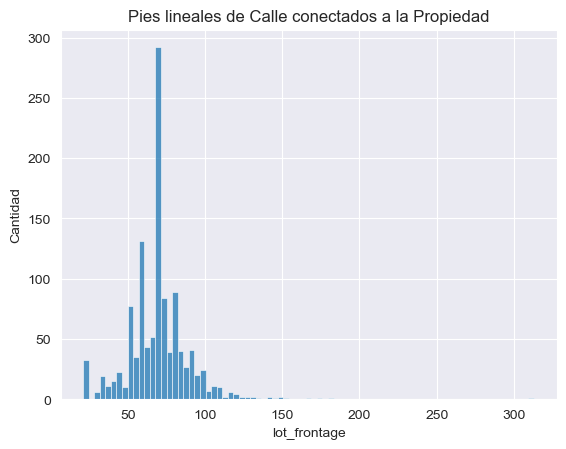

In [11]:
sns.set_style("darkgrid")
histog1 = sns.histplot(data= df_datos_entrenamiento , x="lot_frontage")
histog1.set_title("Pies lineales de Calle conectados a la Propiedad")
histog1.set(ylabel="Cantidad")
plt.show("  "*(50)," ")

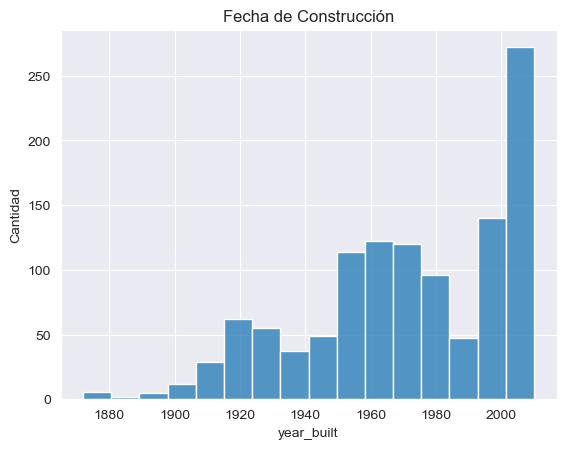

In [12]:
sns.set_style("darkgrid")
histog2 = sns.histplot(data= df_datos_entrenamiento , x="year_built")
histog2.set_title("Fecha de Construcción")
histog2.set(ylabel="Cantidad")
plt.show("  "*(50)," ")

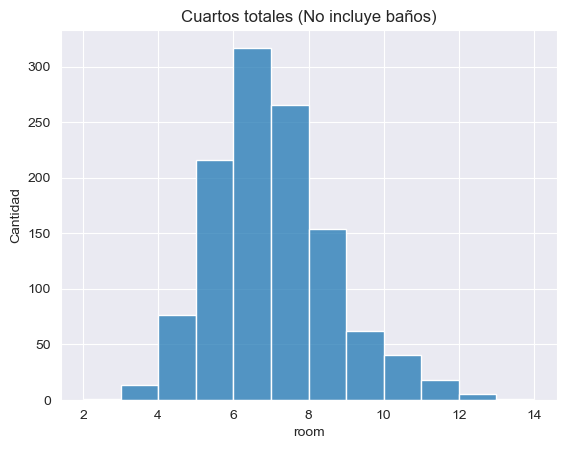

In [13]:
sns.set_style("darkgrid")
histog3 = sns.histplot(data= df_datos_entrenamiento , x="room", binwidth= 1)
histog3.set_title("Cuartos totales (No incluye baños)")
histog3.set(ylabel="Cantidad")
plt.show("  "*(50)," ")

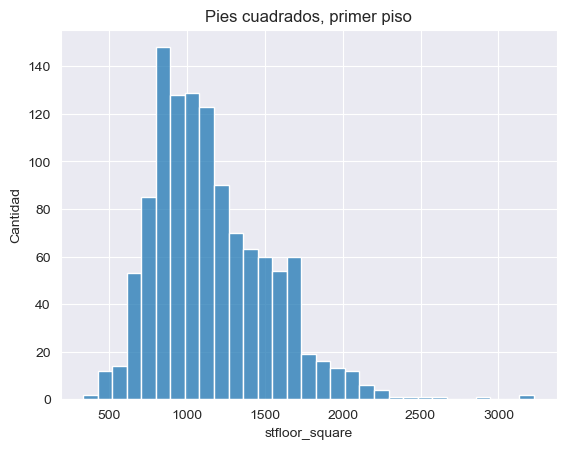

In [14]:
sns.set_style("darkgrid")
histog4 = sns.histplot(data= df_datos_entrenamiento , x="stfloor_square")
histog4.set_title("Pies cuadrados, primer piso")
histog4.set(ylabel="Cantidad")
plt.show("  "*(50)," ")

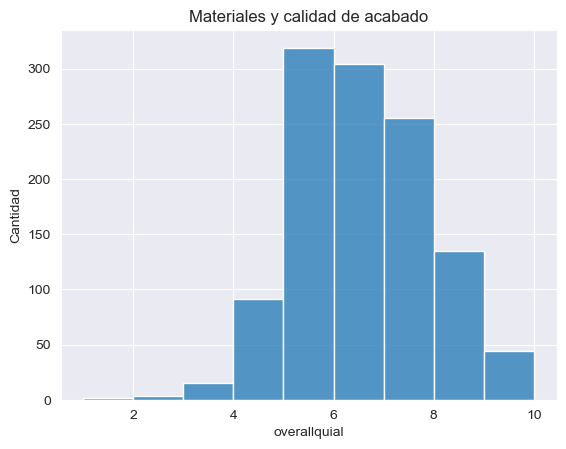

None


In [15]:
sns.set_style("darkgrid")
hist1 = sns.histplot(data= df_datos_entrenamiento , x="overallquial",binwidth = 1)
hist1.set_title("Materiales y calidad de acabado")
hist1.set(ylabel="Cantidad")
print(plt.show("  "*(50)," "))

In [16]:
df_datos_entrenamiento.columns

Index(['overallquial', 'stfloor_square', 'room', 'year_built', 'lot_frontage',
       5],
      dtype='object')

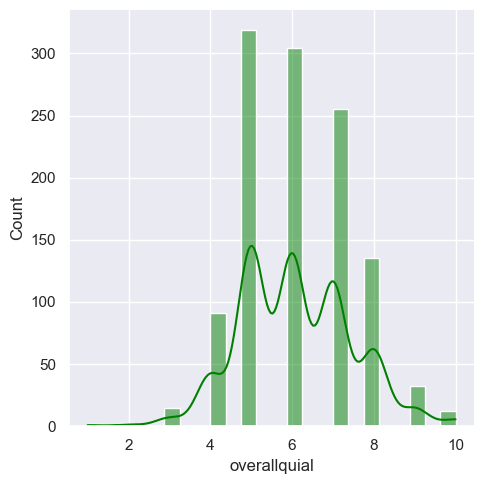

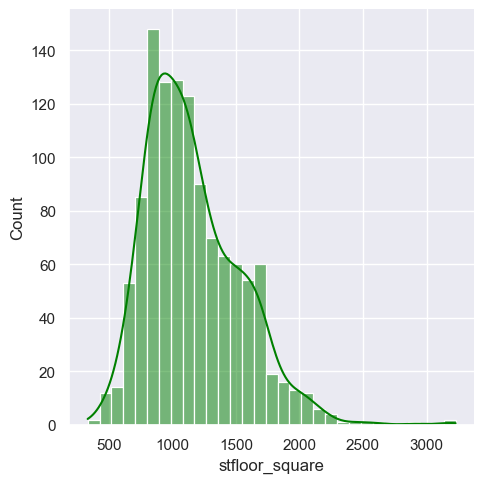

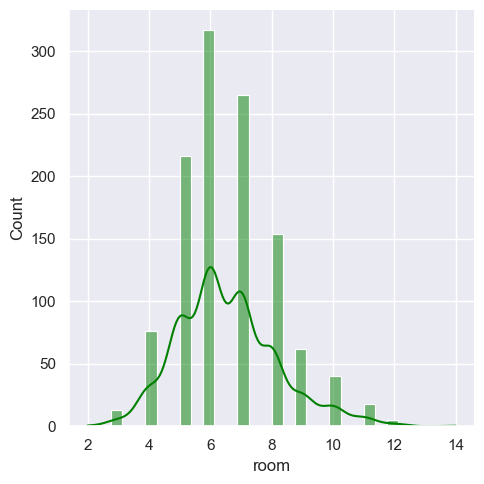

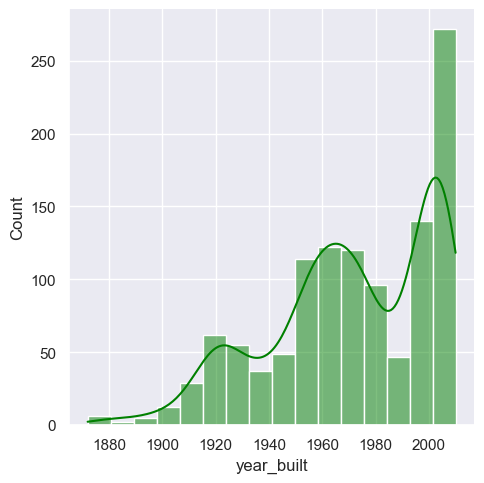

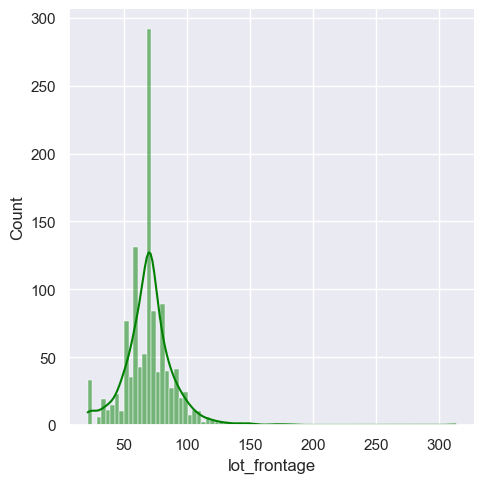

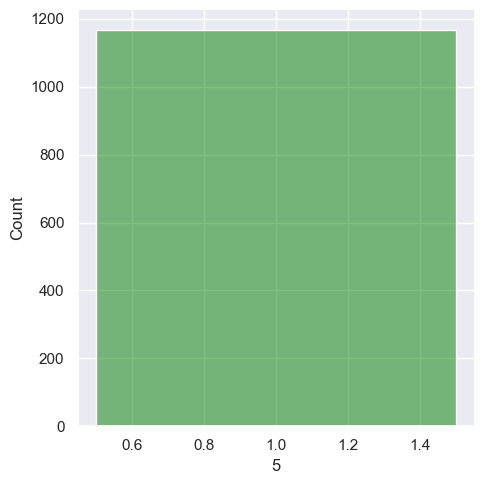

In [17]:
#esta es otra forma de traer los histogramas 
sns.set_theme(style="darkgrid") 

#sns.regplot(x=df_datos_entrenamiento.iloc[:, 0], y=df_datos_entyrenamiento.iloc[:, 1], color='green')
for columna in df_datos_entrenamiento.columns:
    sns.displot(df_datos_entrenamiento[columna],kde=True, color='green')

### Cálculo del Coeficiente de Correlación

In [18]:
df_entrenamiento2 =  df_datos_entrenamiento
df_entrenamiento2["sales"] = pd.DataFrame(y_entrenamiento)

df_entrenamiento2.corr()

df_entrenamiento2[["sales", "overallquial", "stfloor_square", "room", "year_built", "lot_frontage"]].corr()
#esta es una forma de verificar las correlaciones entre las variables

#Lo ideal es identificar cuál es la correlación entre la variable dependiente (Precio) y las variables independientes.

,sales,overallquial,stfloor_square,room,year_built,lot_frontage
sales,1.000000,0.790636,0.620740,0.542658,0.521242,0.340919
overallquial,0.790636,1.000000,0.458779,0.431257,0.571103,0.204818
stfloor_square,0.620740,0.458779,1.000000,0.397916,0.266841,0.364985
room,0.542658,0.431257,0.397916,1.000000,0.087199,0.294921
year_built,0.521242,0.571103,0.266841,0.087199,1.000000,0.118158
lot_frontage,0.340919,0.204818,0.364985,0.294921,0.118158,1.000000


In [19]:
def correlacion(matriz_y, matriz_x):
    lista = ['overallquial','stfloor_square','room','year_built','lot_frontage']
    coeficiente = []
    for i in range(0,len(matriz_x[0])-1):
        coef = np.corrcoef(matriz_y[:,0],matriz_x[:,i])
        a = ("Correlación entre sales_price y "+ str(lista[i])+" "+ str(round ((coef[0][1]),3) ))
        coeficiente.append(str(a))
    return coeficiente

#correlacion(y_entrenamiento,x_entrenamiento)  #Función de los coeficientes de correlación

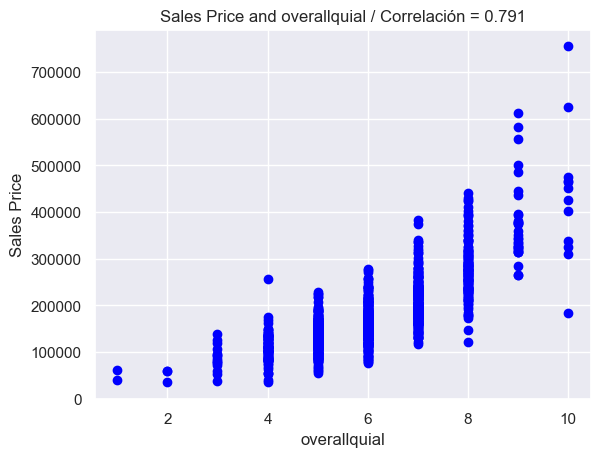

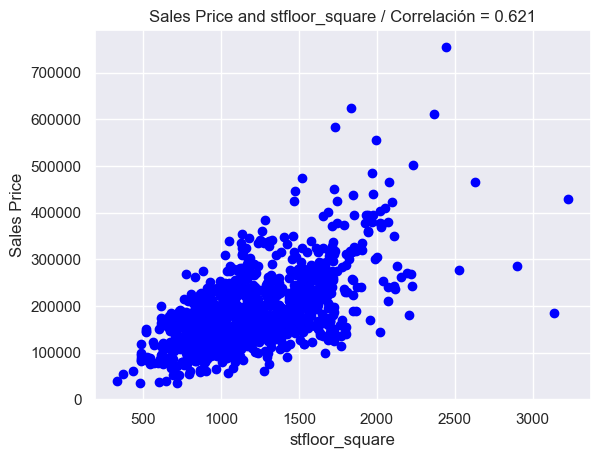

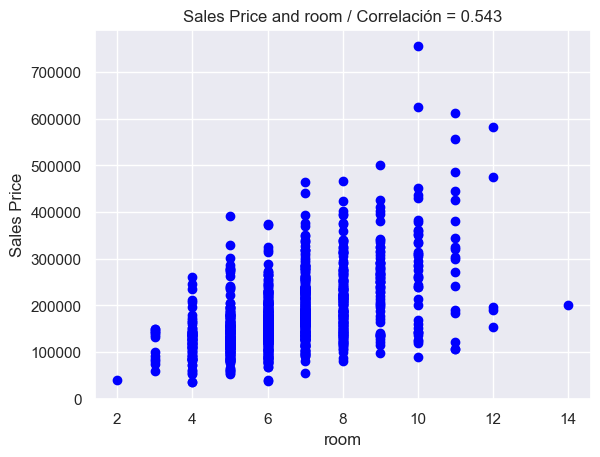

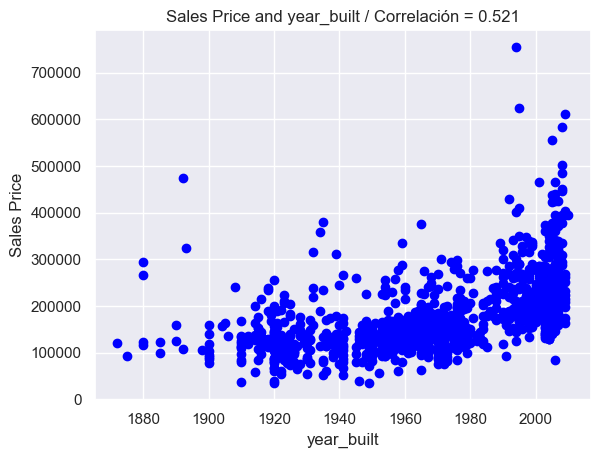

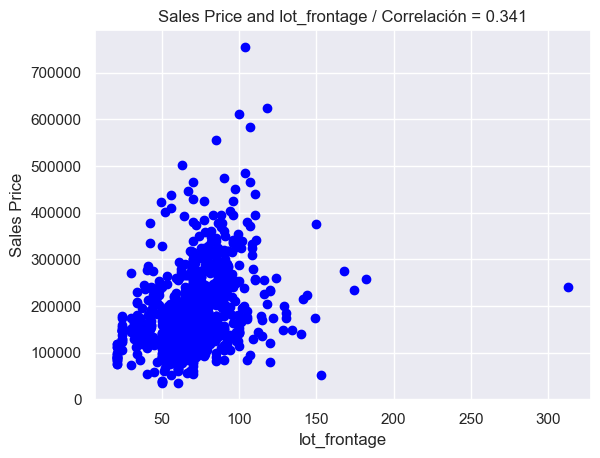

In [20]:
def scatter(variable_x, coeficiente=0):
    plt.scatter(x = df_datos_entrenamiento[[variable_x]], y= pd.DataFrame(y_entrenamiento),color = 'blue')
    plt.title("Sales Price and"+" "+variable_x+" / "+ "Correlación = "+correlacion(y_entrenamiento,x_entrenamiento)[coeficiente][-5:]   )
    plt.xlabel(variable_x)
    plt.ylabel("Sales Price")
    return plt.show()
#Esta es la función para visualizar el Gráfico de dispersión
scatter('overallquial')
scatter('stfloor_square',1)
scatter('room',2)
scatter('year_built',3)
scatter('lot_frontage',4) 

>Al observar la relación de cada variable respecto al precio, se logra observar que la variable que más correlación tiene es overallquial con 0.791, seguido por la segunda variable stfloor_square con 0.621

<h1><center> En este punto se puede empezar el análisis de Regresión Lineal </center></h1>

In [21]:
def pasos(epocas_, learning_rate,iteracion_epocas , x ,y  ):
    """Función que realiza el modelo predictivo de la regresión lineal simple """
 
        
    # Descenso del gradiente
    def g_descendiente(w_, b_, alfa, x, y):
        #""" Función del descenso del gradiente, """
        N = x.shape[0]     

        beta_0 = -(2/N)*np.sum(y-(w_*x+b_))   
   
        beta_1 = -(2/N)*np.sum(x*(y-(w_*x+b_)))

        beta0 = b_ - alfa * beta_0
        beta1 = w_ - alfa * beta_1
    
        return beta1, beta0
      

    np.random.seed(2)
    beta1 = np.random.randn(1)[0] 
    beta0 = np.random.randn(1)[0] 

    alfa = learning_rate 
    epocas = epocas_ 


    error = np.zeros((epocas,1)) #Almacena los errores de cada iteración en relación al tiempo
    history_b0 = [] #Almacena el historial de beta0
    history_b1 = [] #Almacena el historial de beta1
    
    for i in range(epocas):
    #Lo que permite que cada iteración actualice el peso de cada valor es el descenso del gradiente
        [beta1, beta0] = g_descendiente(beta1,beta0,alfa,x,y)
        history_b0.append(beta0) 
        history_b1.append(beta1) 

    #Estimación de y
        y_estimada =  beta0 + beta1*x

     #ECM = error cuadrático medio
        N = y.shape[0]
        error[i] = np.sum((y-y_estimada)**2)/N
    
    #Resultados 
        if (i+1)% iteracion_epocas == 0:  
            print("Epoch {}".format(i+1)) 
            print("....... beta1: {:.1f}".format(beta1), " beta0: {:.1f}".format(beta0)) 
            print("....... error: {}".format(error[i])) 
            print("---------------------------------------")
    
    plt.plot(range(epocas_), error)
    plt.xlabel('Epoch')
    plt.title("Descenso del Gradiente, Epoch = {epocas} ".format(epocas =str( epocas_)  ), fontsize = 13 )
    plt.suptitle("Gráfico")
    plt.ylabel('Error Cuadrádico Medio')
    plt.show()
    
    return beta0, beta1, epocas, error, history_b0, history_b1, plt.show() 

Epoch 200
....... beta1: 23749.6  beta0: 3527.1
....... error: [4.25421032e+09]
---------------------------------------
Epoch 400
....... beta1: 28562.9  beta0: 4089.2
....... error: [2.84527714e+09]
---------------------------------------
Epoch 600
....... beta1: 29557.0  beta0: 4053.5
....... error: [2.78625367e+09]
---------------------------------------
Epoch 800
....... beta1: 29780.8  beta0: 3897.6
....... error: [2.78214562e+09]
---------------------------------------
Epoch 1000
....... beta1: 29849.2  beta0: 3717.7
....... error: [2.78027769e+09]
---------------------------------------


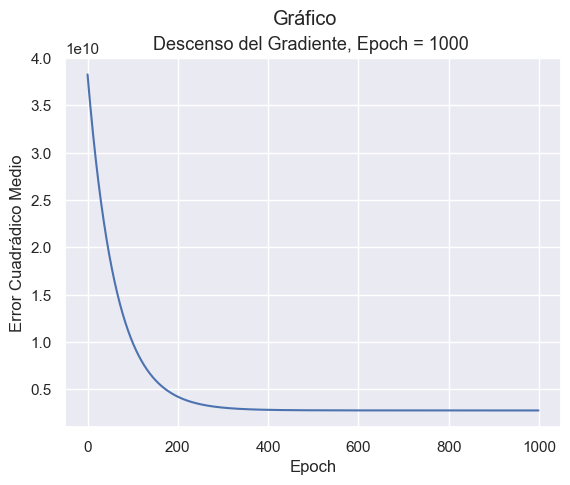

In [22]:
prediccion = pasos(1000,0.0001,200,  x_entrenamiento[:,0], y_entrenamiento[:,0] )

In [28]:
def plot_evolucion_modelo(datoIncercepto, datoPendiente, x_entrenamiento, y_entrenamiento, repeticiones):
    """Función muestra los diferentes gráficos de como evoluciona el modelo a través del tiempo
    se puede ingresar el parametro del número de veces que desea ver la evolución"""
    lista_b0 = list(datoIncercepto) # datos del intercepto
    lista_b1 = list(datoPendiente) # datos de la pendiente

    for i in range(0, len(lista_b0), repeticiones ): # el parametro n : imprime el numero de veces que se requiera
        y_estimada = lista_b0[i] + lista_b1[i] * x_entrenamiento  
        # grafico del plot
        plt.plot(x_entrenamiento, y_entrenamiento , 'bo', label='Datos de entrenamiento')
        plt.plot(x_entrenamiento, y_estimada , 'r', label='modelo')
        plt.title(f'Evolución del modelo después de {i+1} iteraciones')
        plt.xlabel('')
        plt.legend()
        plt.show()

### A este punto se puede comprobar si funciona el modelo al ejecutarlo; como sigue:

Epoch 200
....... beta1: 23749.6  beta0: 3527.1
....... error: [4.25421032e+09]
---------------------------------------
Epoch 400
....... beta1: 28562.9  beta0: 4089.2
....... error: [2.84527714e+09]
---------------------------------------
Epoch 600
....... beta1: 29557.0  beta0: 4053.5
....... error: [2.78625367e+09]
---------------------------------------
Epoch 800
....... beta1: 29780.8  beta0: 3897.6
....... error: [2.78214562e+09]
---------------------------------------
Epoch 1000
....... beta1: 29849.2  beta0: 3717.7
....... error: [2.78027769e+09]
---------------------------------------


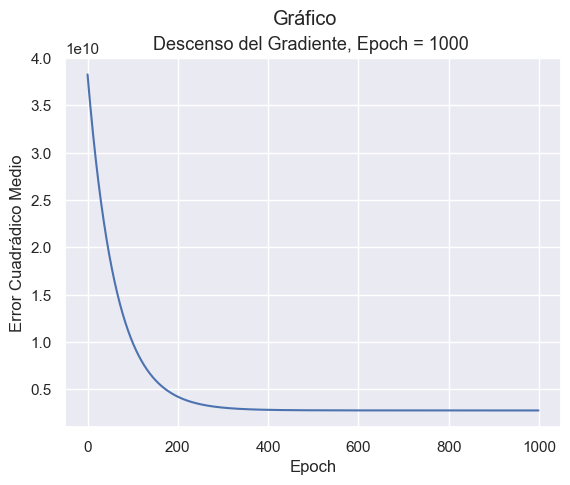

In [29]:
predicción = pasos(1000,0.0001,200,  x_entrenamiento[:,0], y_entrenamiento[:,0] )

### A continuación se verifica la evolución del modelo en relación al tiempo

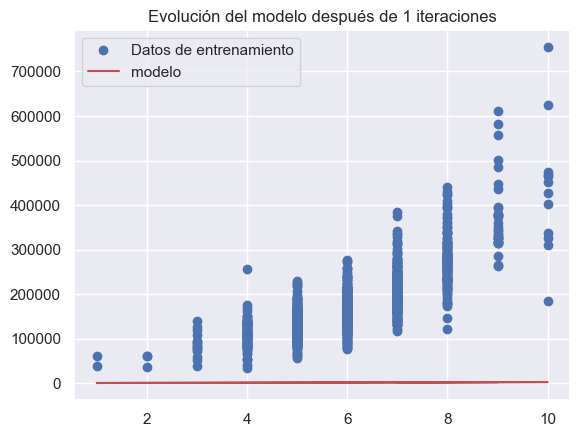

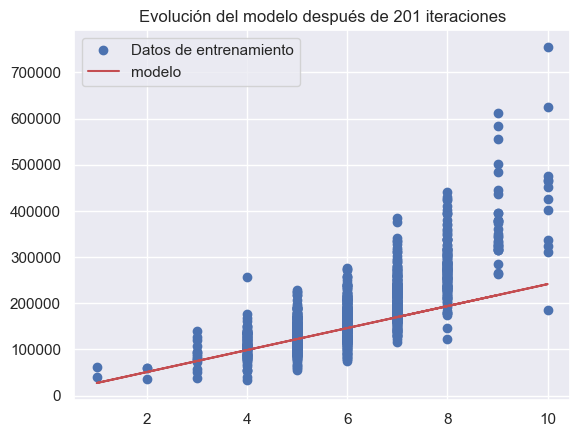

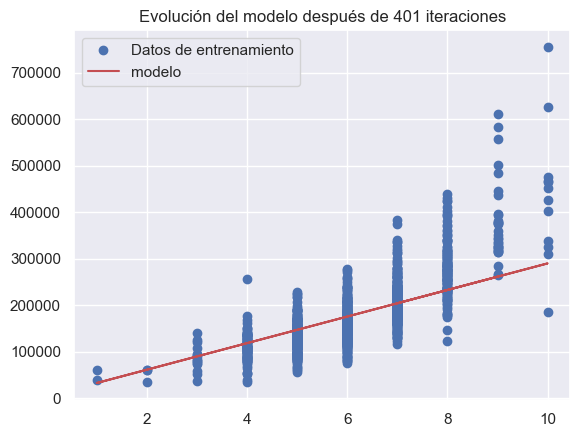

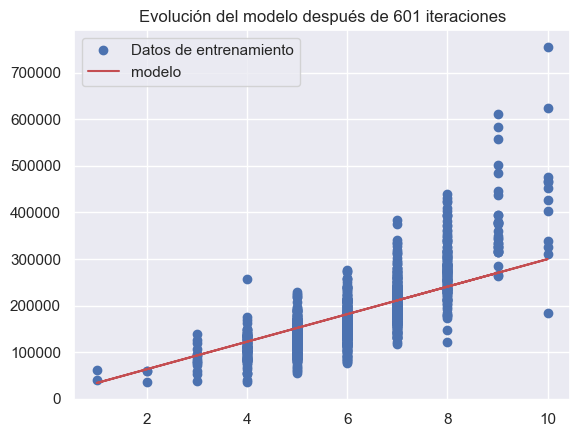

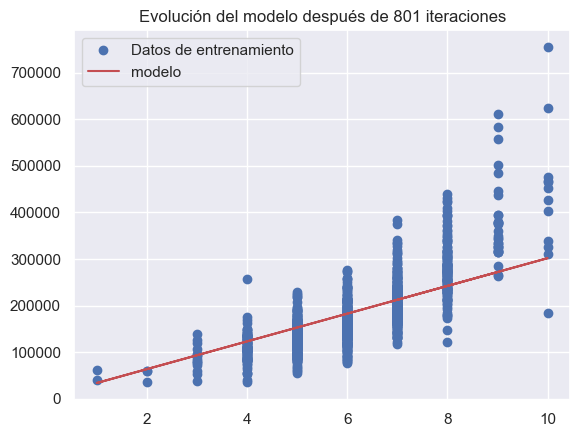

In [31]:
plot_evolucion_modelo(prediccion[4], prediccion[5], x_entrenamiento[:,0], y_entrenamiento[:,0], 200)

Verificación de resultados, gráfica de entrenamiento y prueba

In [34]:
def Evolucion_plot_ver_resultados(beta0, beta1, data_x, data_y, label_, condicion_, data_x2=0):
    x_p = data_x
    y_estimada = beta0 + beta1 * data_x
    condicion = condicion_
    if condicion == "entrenamiento":
        plt.scatter(x_p, data_y, label=label_)
        plt.plot(x_p, y_estimada, 'r', label='modelo')
    else:
        plt.scatter(data_x2, data_y, label=label_)
        plt.plot(x_p, y_estimada, 'r', label='modelo')

    plt.title("Gráfica de dispersión -{label}-".format(label=label_))
    plt.suptitle("Resultado ")
    plt.xlabel('eje x')
    plt.ylabel('Prices Sales')
    plt.legend()
    plt.show()

Plot de la última iteración (datos de entrenamiento)

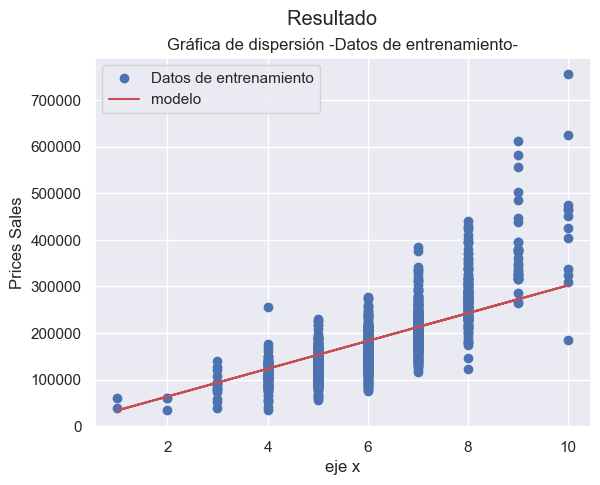

In [35]:
Evolucion_plot_ver_resultados(prediccion[0],prediccion[1],x_entrenamiento[:,0], y_entrenamiento[:,0], 'Datos de entrenamiento', "entrenamiento")
# Donde
# p[0] =  coeficiente beta0
# p[0] =  coeficiente beta1
# X_entrenamiento[:,0] = variable independiente de entrenamiento
# y_entrenamiento[:,0] = variable dependiente de entrenamiento,
# 'Datos de entrenamiento' = titulo del gráfico
# "entrenamiento" = corresponde a datos de entrenamiento

Plot de la última iteración (datos de prueba)

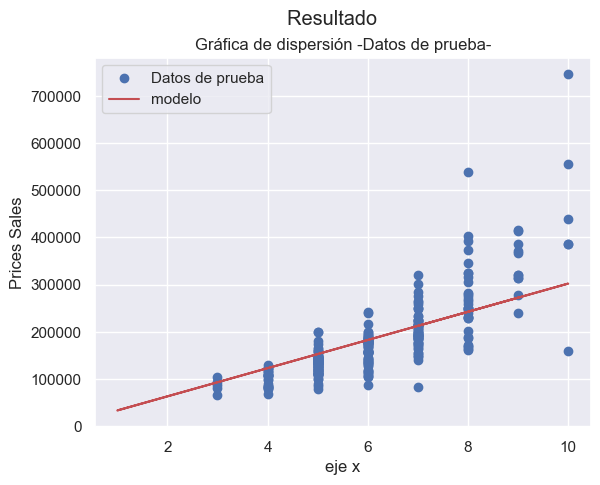

In [36]:
Evolucion_plot_ver_resultados(prediccion[0],prediccion[1],x_entrenamiento[:,0], y_prueba[:,0], 'Datos de prueba',"prueba",x_prueba[:,0])
# Donde
# p[0] =  coeficiente beta0
# p[0] =  coeficiente beta1
# X_entrenamiento[:,0] = variable independiente de entrenamiento (variable overllqual)
# y_entrenamiento[:,0] = variable dependiente de entrenamiento,
# 'Datos de entrenamiento' = titulo del gráfico
# "prueba" = corresponde a datos de prueba
# x_prueba[:,0] =  corresponde a los datos de prueba

Resultado de las estimaciones

In [42]:
def estimacion(x_prueba):
    lista= x_prueba
    y_predictivo = []
    x_valores = []
    for i in range(0 , (len(x_prueba)) ):
        y_predictivo.append((np.array(prediccion[0])).astype(int) + (np.array(prediccion[1]))*list(lista)[i])
        x_valores.append(list(lista)[i] )
    
    df = pd.DataFrame()
    df["y_estimado"] = pd.Series(y_predictivo)
    df["valores_de_x"] = pd.Series(x_valores)
    return df

Valores de ŷ y y prueba

In [43]:
pred = pd.DataFrame(estimacion(x_prueba[:,0]))
pred['y_prueba'] = pd.Series(np.squeeze( y_prueba[:,0]))
print(pred.head(5))

      y_estimado  valores_de_x  y_prueba
0  182812.114410           6.0  200624.0
1  182812.114410           6.0  133000.0
2  152962.928675           5.0  110000.0
3  212661.300146           7.0  192000.0
4  182812.114410           6.0   88000.0


Error de la prediccón 
 (datos de prueba)

In [52]:
def calcular_error(y, y_estimada):
    y = np.array(y)
    y_estimada = np.array(y_estimada)
    """Función para obtener el error del modelo """
    N = y.shape[0] # N es el tamaño del dataseto o de las observaciones
    error = np.sum((y - y_estimada)**2) / N
    return error
    
_error = calcular_error(y_prueba[:,0], prediccion[0]+prediccion[1]*x_prueba[:,0])
print (_error)

3123234446.803899


### usando sklearn


In [53]:
def modelo_sklearn(data_x, data_y, condicion):
    # Partiendo los datos en el 80% de entrenamiento y 20% prueba
    X_entrenamiento_s, x_prueba_s, y_entrenamiento_s, y_prueba_s = train_test_split(data_x, data_y, test_size =0.2, random_state = 0)

    # Ajustando la regresión lineal simple a los datos de entrenamiento
    regresionLineal = LinearRegression()
    regresionLineal.fit(X_entrenamiento_s, y_entrenamiento_s)
    
    if condicion != "plot":
        return regresionLineal.predict(X_entrenamiento_s)
    else:
        # Resultados con los datos de entrenamiento
        plt.scatter(X_entrenamiento_s, y_entrenamiento_s, color = 'blue')
        plt.plot(X_entrenamiento_s, regresionLineal.predict(X_entrenamiento_s), color = 'red')
        plt.title('Gráfica de dispersión (Entrenamientos)')
        plt.xlabel('Variable independiente')
        plt.ylabel('Sales Prices')
        plt.show()

        # Resultados con los datos de prueba 
        plt.scatter(x_prueba_s, y_prueba_s, color = 'blue')
        plt.plot(X_entrenamiento_s, regresionLineal.predict(X_entrenamiento_s), color = 'red')
        plt.title('Gráfica de dispersión (Prueba)')
        plt.xlabel('Variable independiente')
        plt.ylabel('Sales Prices')
        plt.show()

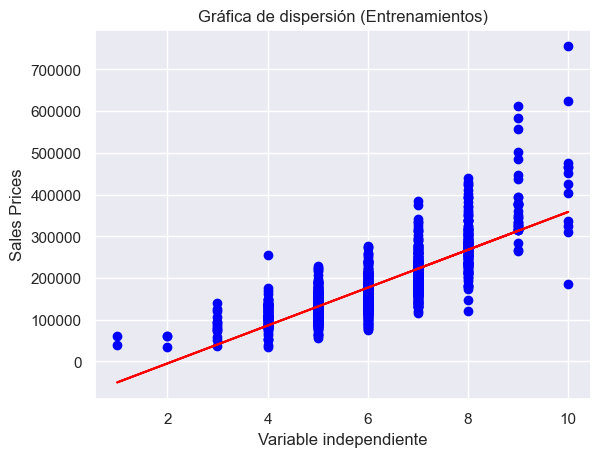

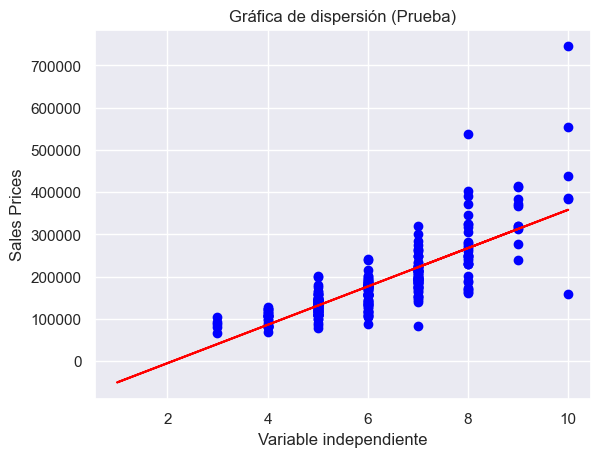

In [54]:
modelo_sklearn(df_datos.iloc[:, 1:2].values, df_datos.iloc[:, :1].values, "plot" )


### Comparación del error de los modelos

Epoch 200
....... beta1: 23749.6  beta0: 3527.1
....... error: [4.25421032e+09]
---------------------------------------
Epoch 400
....... beta1: 28562.9  beta0: 4089.2
....... error: [2.84527714e+09]
---------------------------------------
Epoch 600
....... beta1: 29557.0  beta0: 4053.5
....... error: [2.78625367e+09]
---------------------------------------
Epoch 800
....... beta1: 29780.8  beta0: 3897.6
....... error: [2.78214562e+09]
---------------------------------------
Epoch 1000
....... beta1: 29849.2  beta0: 3717.7
....... error: [2.78027769e+09]
---------------------------------------


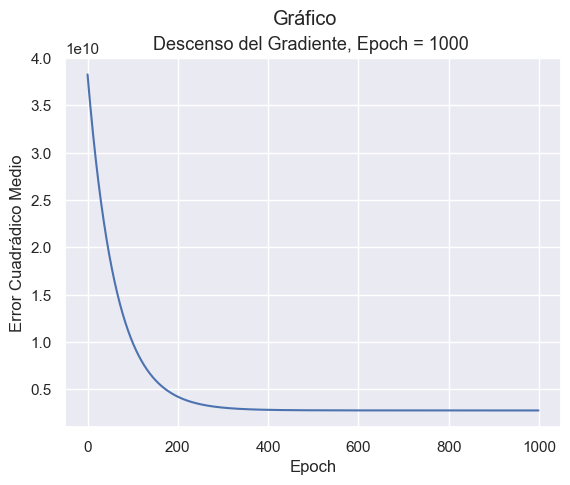

Epoch 200
....... beta1: 153.0  beta0: 0.1
....... error: [3.86500468e+09]
---------------------------------------
Epoch 400
....... beta1: 153.4  beta0: 0.1
....... error: [3.86480453e+09]
---------------------------------------
Epoch 600
....... beta1: 153.4  beta0: 0.1
....... error: [3.86480447e+09]
---------------------------------------
Epoch 800
....... beta1: 153.4  beta0: 0.1
....... error: [3.86480441e+09]
---------------------------------------
Epoch 1000
....... beta1: 153.4  beta0: 0.1
....... error: [3.86480435e+09]
---------------------------------------


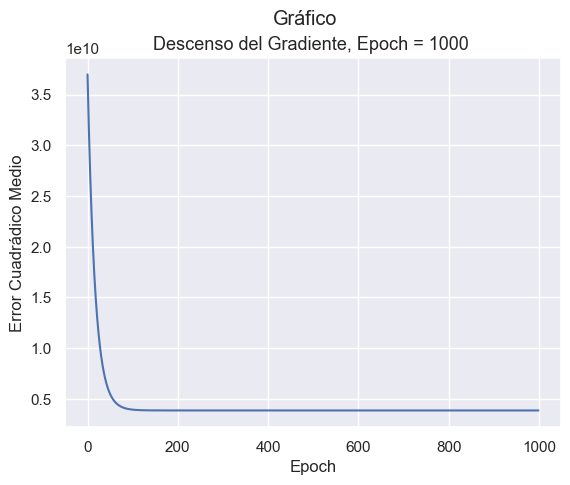

In [56]:
p = pasos(1000,0.0001,200,  x_entrenamiento[:,0], y_entrenamiento[:,0] ) # tasa de aprendizaje de 0.0001
p2 = pasos(1000,0.00000001,200,  x_entrenamiento[:,1], y_entrenamiento[:,0] ) #tasa de aprendizaje de 0.0000001

### Coeficiente de correlación de ambos modelos

In [59]:
def coeficiente_correlacion(coeficientes, x_entrenamiento, y_entrenamiento):
    coeficientes = np.array(coeficientes)
    x_entrenamiento = np.array(x_entrenamiento)
    y_entrenamiento = np.array(y_entrenamiento)
    b_ = coeficientes.T
    x_ = x_entrenamiento.T
    y_ = y_entrenamiento

    c1 = np.dot(np.dot(b_,x_),y_)- (len(y_)*((np.mean(y_))**2   ))
    c2 = np.dot(y_.T, y_)- (len(y_)*((np.mean(y_))**2   )) 
    return round( (c1/c2)**(1/2),4 )

### Coeficiente de correlacion entre "x" y "y"

In [61]:
#coeficiente de correlación entre la variable independiente overallquial
correlacion = coeficiente_correlacion(p[0:2], x_entrenamiento[:,[5,0]], y_entrenamiento[:,0])
print(correlacion) 

0.7388


In [64]:
# coeficiente de correlación entre la variable independiente stfloor_square
correlacion_ = coeficiente_correlacion(p2[0:2], x_entrenamiento[:,[5,1]] ,y_entrenamiento[:,0])
print(correlacion) 

0.7388


### Análisis

### Gráficas (del error) entrenadas manualmente

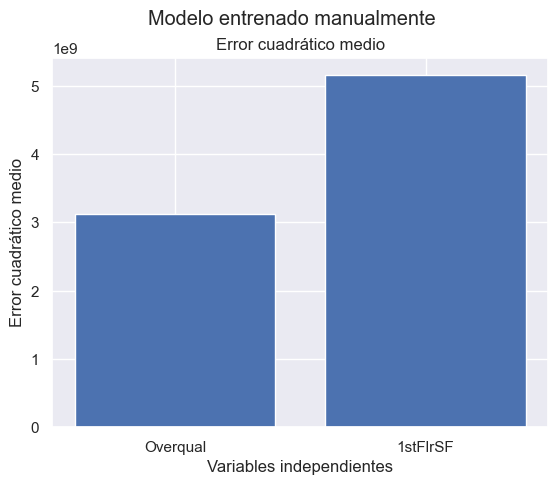

El mejor modelo que podría explicar el precio de la vivienda es: el modelo 1


In [67]:
errorCuadraticoMedio1 = calcular_error( y_prueba[:,0],  p[0]+p[1]*x_prueba[:,0] )
errorCuadraticoMedio2 = calcular_error( y_prueba[:,0],  p2[0]+p2[1]*x_prueba[:,1] )

# graficar los errores para cada modelo
x_labels = ['Overqual', '1stFlrSF']
mse_values = [errorCuadraticoMedio1,errorCuadraticoMedio2 ]
plt.bar(x_labels, mse_values)
plt.xlabel('Variables independientes')
plt.ylabel('Error cuadrático medio')
plt.title("Error cuadrático medio")
plt.suptitle("Modelo entrenado manualmente")
plt.show()

# seleccionar el mejor modelo para cada variable independiente
mejor_modelo = np.argmin([errorCuadraticoMedio1, errorCuadraticoMedio2], axis=0)
print('El mejor modelo que podría explicar el precio de la vivienda es: el modelo', mejor_modelo+1)

### Gráficas (del error) entrenadas con sklearn

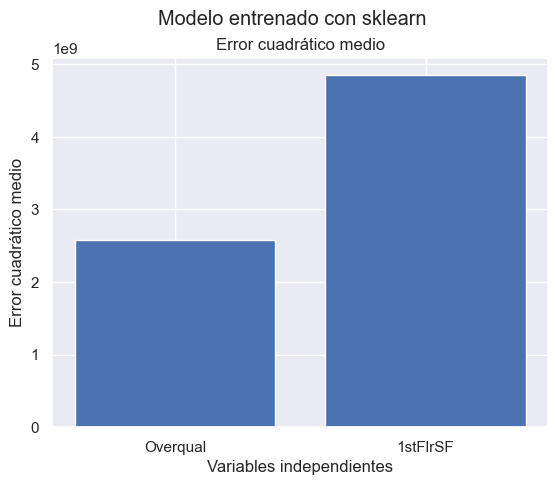

El mejor modelo que podría explicar el precio de la vivienda es: el modelo 1


In [69]:
# Obteniendo el 80% para el entrenamiento y el 20% prueba
def error_sklearn(X_s, y_s ):
    X_entrenamiento_s, x_prueba_s, y_entrenamiento_s, y_prueba_s = train_test_split\
    (X_s, y_s, test_size =0.2, random_state = 0)

    # ajustar varios modelos de regresión lineal
    model1 = LinearRegression().fit(X_entrenamiento_s, y_entrenamiento_s)

    # predecir los valores de validación para cada modelo y calcular el error
    y_pred1 = model1.predict(x_prueba_s)
    mse1 = mean_squared_error(y_prueba_s, y_pred1)
    return mse1

errorCuadraticoMedio1 = error_sklearn(df_datos.iloc[:, 1:2], df_datos.iloc[:, :1] )
errorCuadraticoMedio2 = error_sklearn(df_datos.iloc[:, 2:3], df_datos.iloc[:, :1] )

# graficar los errores para cada modelo
x_labels_s = ['Overqual', '1stFlrSF']
mse_values_s = [errorCuadraticoMedio1, errorCuadraticoMedio2]
plt.bar(x_labels_s, mse_values_s)
plt.xlabel('Variables independientes')
plt.ylabel('Error cuadrático medio')
plt.title("Error cuadrático medio")
plt.suptitle("Modelo entrenado con sklearn")
plt.show()

# seleccionar el mejor modelo para cada variable independiente
best_models = np.argmin([errorCuadraticoMedio1, errorCuadraticoMedio2], axis=0)
print('El mejor modelo que podría explicar el precio de la vivienda es: el modelo', mejor_modelo+1)